In [1]:
import sympy as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.signal as sig
import pickle
import os.path

import sys
sys.path.append('..')
from systemprbm import UnitCell, System
import prbm_helper_functions as phf

import scipy.interpolate as interp
from ECA_plotting import *
from ElementaryCA import *
from matplotlib.animation import FuncAnimation

params = phf.define_params()
rule_dict = separable_rules()

from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


In [2]:
filename = 'output_dict.pkl'
with open(filename, 'rb') as f:
    output_dict = pickle.load(f)
    

In [3]:
params["tog_offset"]=1.4e-3

NameError: name 'stiffnesses' is not defined

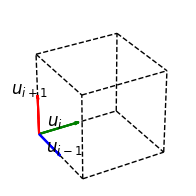

In [4]:
fig = plt.figure(figsize=(5,5),dpi=100)
ax2 = fig.add_subplot(122,projection='3d')
plotSetup(fig=fig, ax=ax2)
drawCube(ax2)
plot_triad_quiver(ax2,0.5)
planes= plot_cube_with_planes(ax2,stiffnesses,k_critical,k_critical2)
planes[0].set_color('orange')
planes[1].set_color('cyan')

In [5]:
config = [0,0,0,0,0]
system = System(config,params)

In [6]:
d6range = np.linspace(28.7e-3,60e-3,50)
slopes = []
for d6 in d6range:
    slopes.append(system.get_threshold_stiffnesses(d6max=d6))
slopes = np.array(slopes)
slopes = slopes[:,:,2]

In [7]:
stiffness_ratio = slopes[:,1]/slopes[:,0]
slope1_spline = interp.UnivariateSpline(d6range, -slopes[:,0], s=0)
slope2_spline = interp.UnivariateSpline(d6range, -slopes[:,1], s=0)
stiffness_ratio_spline_inverse = interp.UnivariateSpline(stiffness_ratio[::-1], d6range[::-1], s=0)

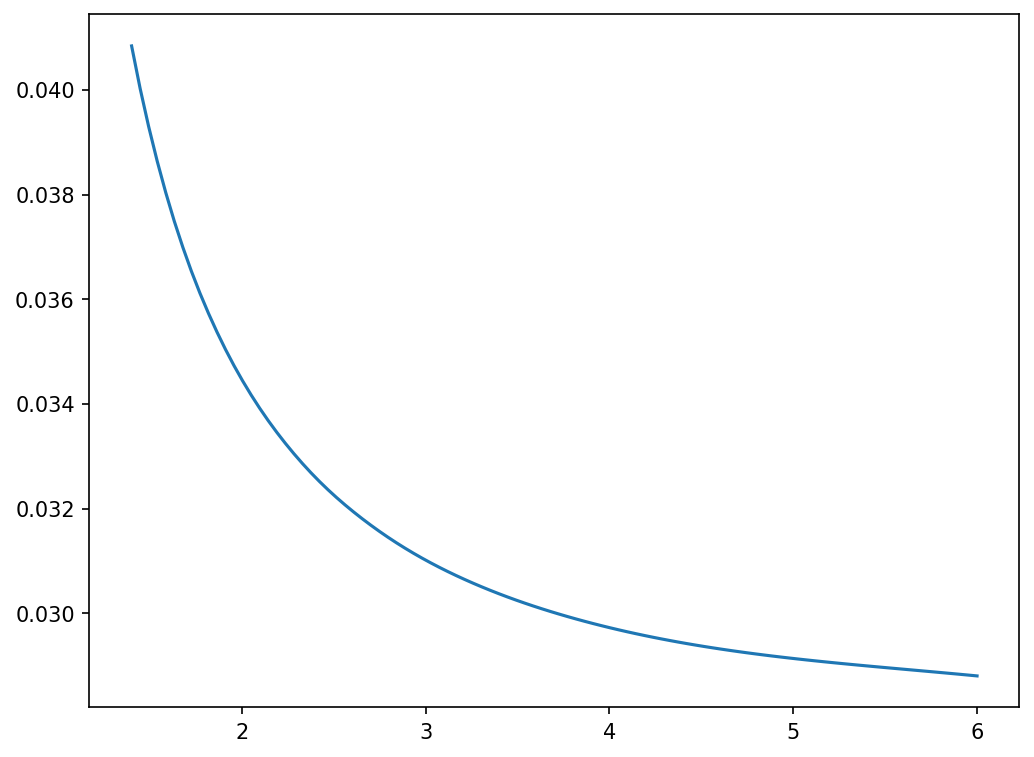

In [8]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
ax.plot(np.linspace(1.4,6,100), stiffness_ratio_spline_inverse(np.linspace(1.4,6,100)))

In [9]:
def plot_multi_dashed(ax,x,y,colors,total_length=6,segment_length=2):
    n = len(colors)  # The number of segment
    segment_length = total_length/n  # Total length of one cycle of dashes
    segs=[]
    for i, color in enumerate(colors):
        offset = i * segment_length
        h, = ax.plot(x, y, linestyle=(offset, (segment_length, total_length - segment_length)), color=color,lw=1)
        segs.append(h)
    return segs



Rule: 110, d6: 31.01 mm, k_critical: 171.81 N/m, k_critical2: 515.39 N/m, stiffnesses: 114.54 N/m, 229.08 N/m, 229.08 N/m


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


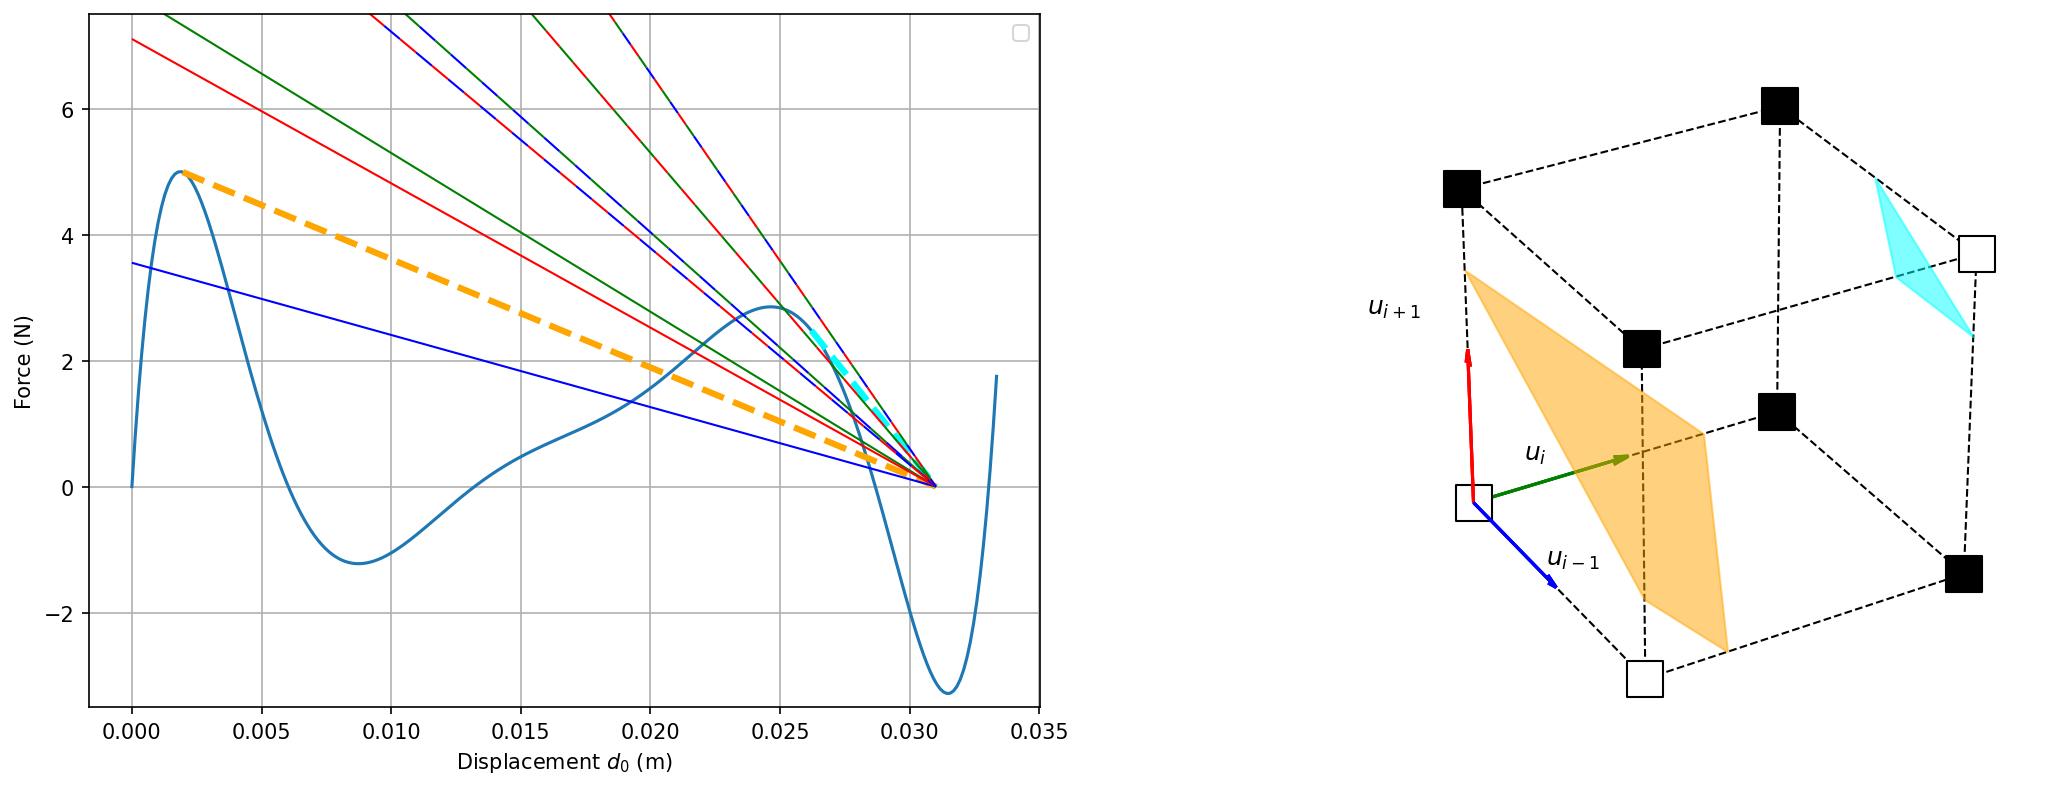

In [32]:
%run ../ElementaryCA.py
%run ../ECA_plotting.py
rule_dict = separable_rules()
rulenum = 110
rule = rule_dict[rulenum]
d6 = stiffness_ratio_spline_inverse(rule[1][1]/rule[1][0])
k_critical = slope1_spline(d6)
k_critical2 = slope2_spline(d6)
stiffnesses = rule[0]*k_critical/rule[1][0]
params['K1'],params['K2'],params['K3'] = stiffnesses
params['K2'] *= 1.1

print(f'Rule: {rulenum}, d6: {d6*1e3:.2f} mm, k_critical: {k_critical:.2f} N/m, k_critical2: {k_critical2:.2f} N/m, stiffnesses: {stiffnesses[0]:.2f} N/m, {stiffnesses[1]:.2f} N/m, {stiffnesses[2]:.2f} N/m')
config = [0,0,0]
system = System(config,params)

fig = plt.figure(figsize=(18,6))
fig.dpi=150
ax1 = fig.add_subplot(121)
plt.grid()

force_response, d0 = system.get_force_response()
results = system.get_threshold_stiffnesses(d6max=d6)
ax1.plot(d0,force_response)
ax1.set_xlabel(r'Displacement $d_0$ (m)')
ax1.set_ylabel('Force (N)')

ax1.plot((results[0][0],d6),(results[0][1],0),'--',linewidth=3, color='orange')
ax1.plot((results[1][0],d6),(results[1][1],0),'--',linewidth=3, color='cyan')
ps = powerset([params['K1'],params['K2'],params['K3']])
sums =[sum(x) for x in list(ps) if x]
colors = ['b','g','r',['b','g'],['b','r'],['r','g'],['b','g','r']]
vertices = [[1,0,0],[0,1,0],[0,0,1],[1,1,0],[1,0,1],[0,1,1],[1,1,1]]
cum_stiffness_lines = []
for c,num in zip(colors,sums):
    # ax1.plot((0,d6-params['tog_offset']),(num*(d6-params['tog_offset']),0),c+'--',linewidth=0.8)
    # ax1.plot((0,d6),(num*(d6),0),c+'-',linewidth=0.8)
    cum_stiffness_lines.append(plot_multi_dashed(ax1,np.linspace(0,d6,100),np.linspace(num*d6,0,100),c,20))
#set ylimits
ax1.set_ylim([-3.5,7.5])
ax1.legend()


ax2 = fig.add_subplot(122,projection='3d')
plotSetup(fig=fig, ax=ax2)
drawCube(ax2)
plot_triad_quiver(ax2,0.5)
planes= plot_cube_with_planes(ax2,stiffnesses,k_critical,k_critical2)
planes[0].set_color('orange')
planes[1].set_color('cyan')








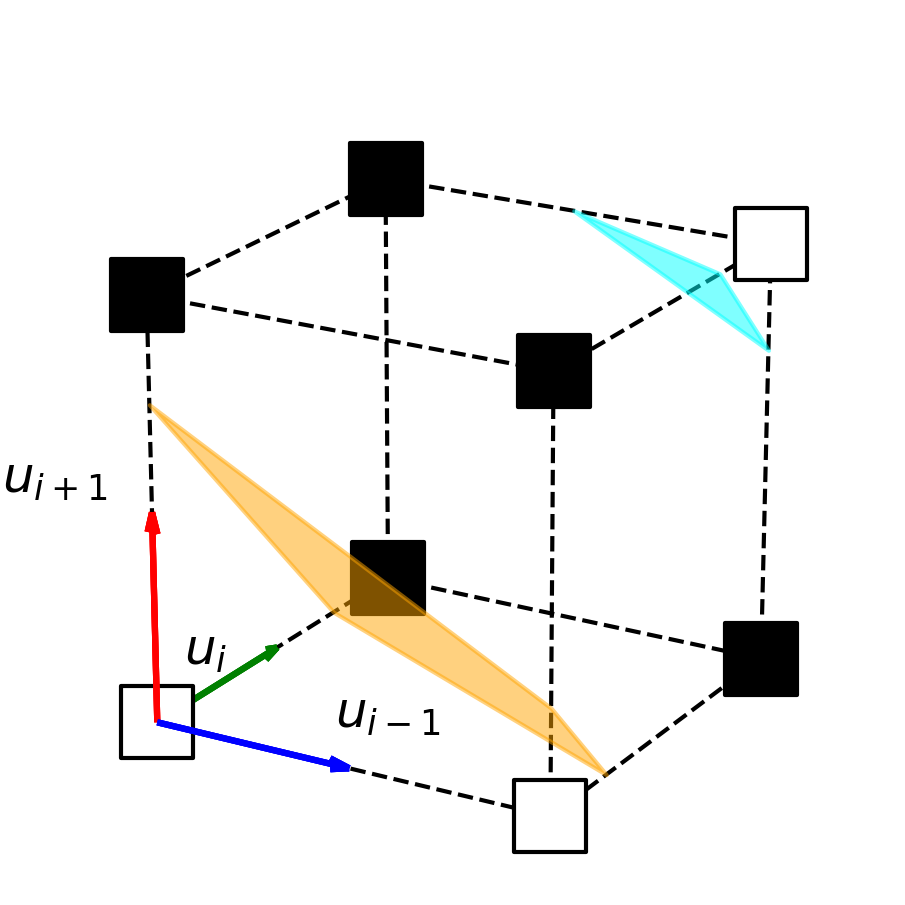

In [33]:
fig = plt.figure(figsize=(8,8),dpi=300)
ax2 = fig.add_subplot(122,projection='3d')
plotSetup(fig=fig, ax=ax2)
drawCube(ax2)
plot_triad_quiver(ax2,0.5)
planes= plot_cube_with_planes(ax2,stiffnesses,k_critical,k_critical2)
planes[0].set_color('orange')
planes[1].set_color('cyan')
ax2.view_init(20, -60)

Text(0, 0.5, '$F_r$ (N)')

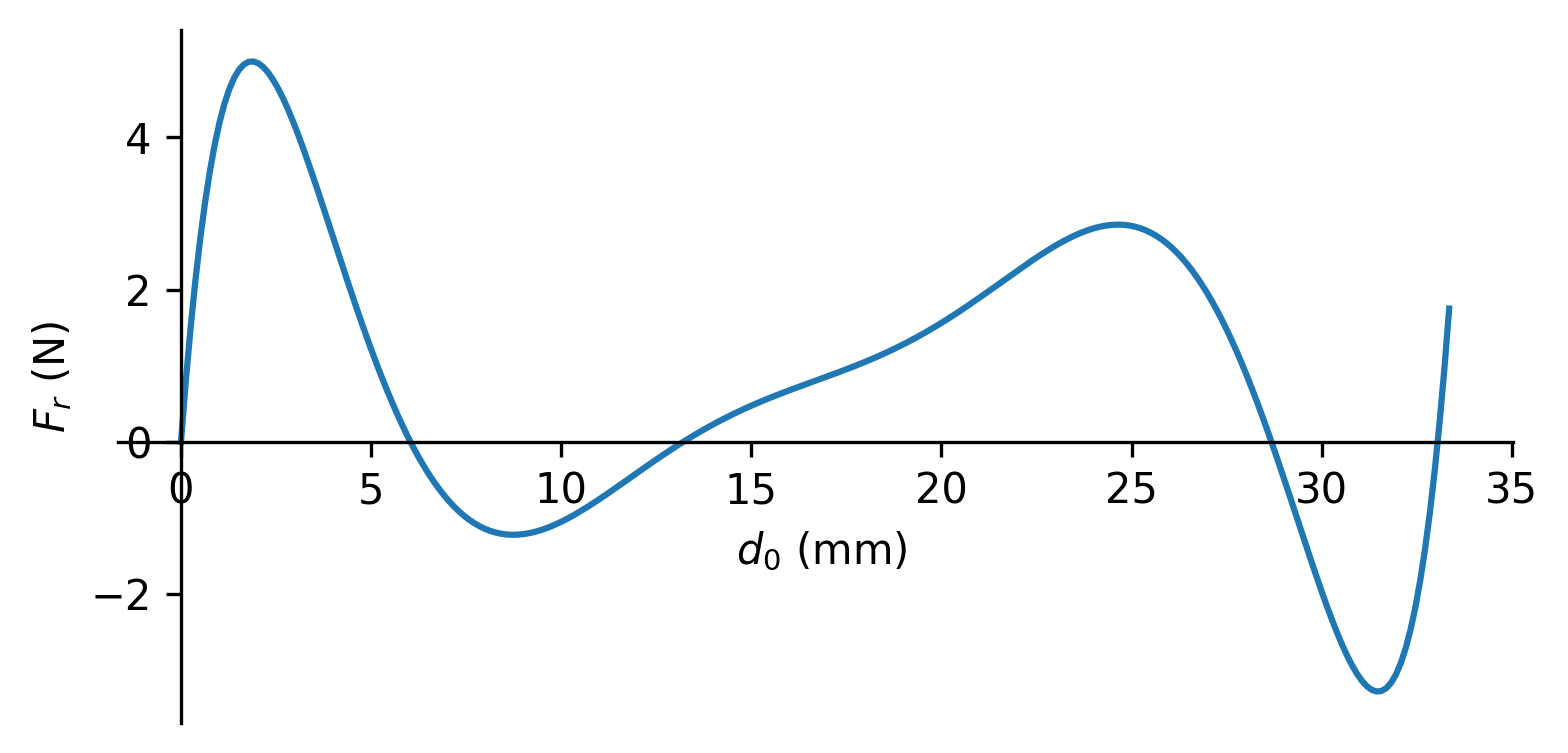

In [262]:
fig = plt.figure(figsize=(6,3),dpi=300)
ax = fig.add_subplot(111)
ax.plot(d0*1000,force_response)
ax_style(ax)
ax.set_xlabel(r' $d_0$ (mm)')
ax.set_ylabel(r'$F_r$ (N)')


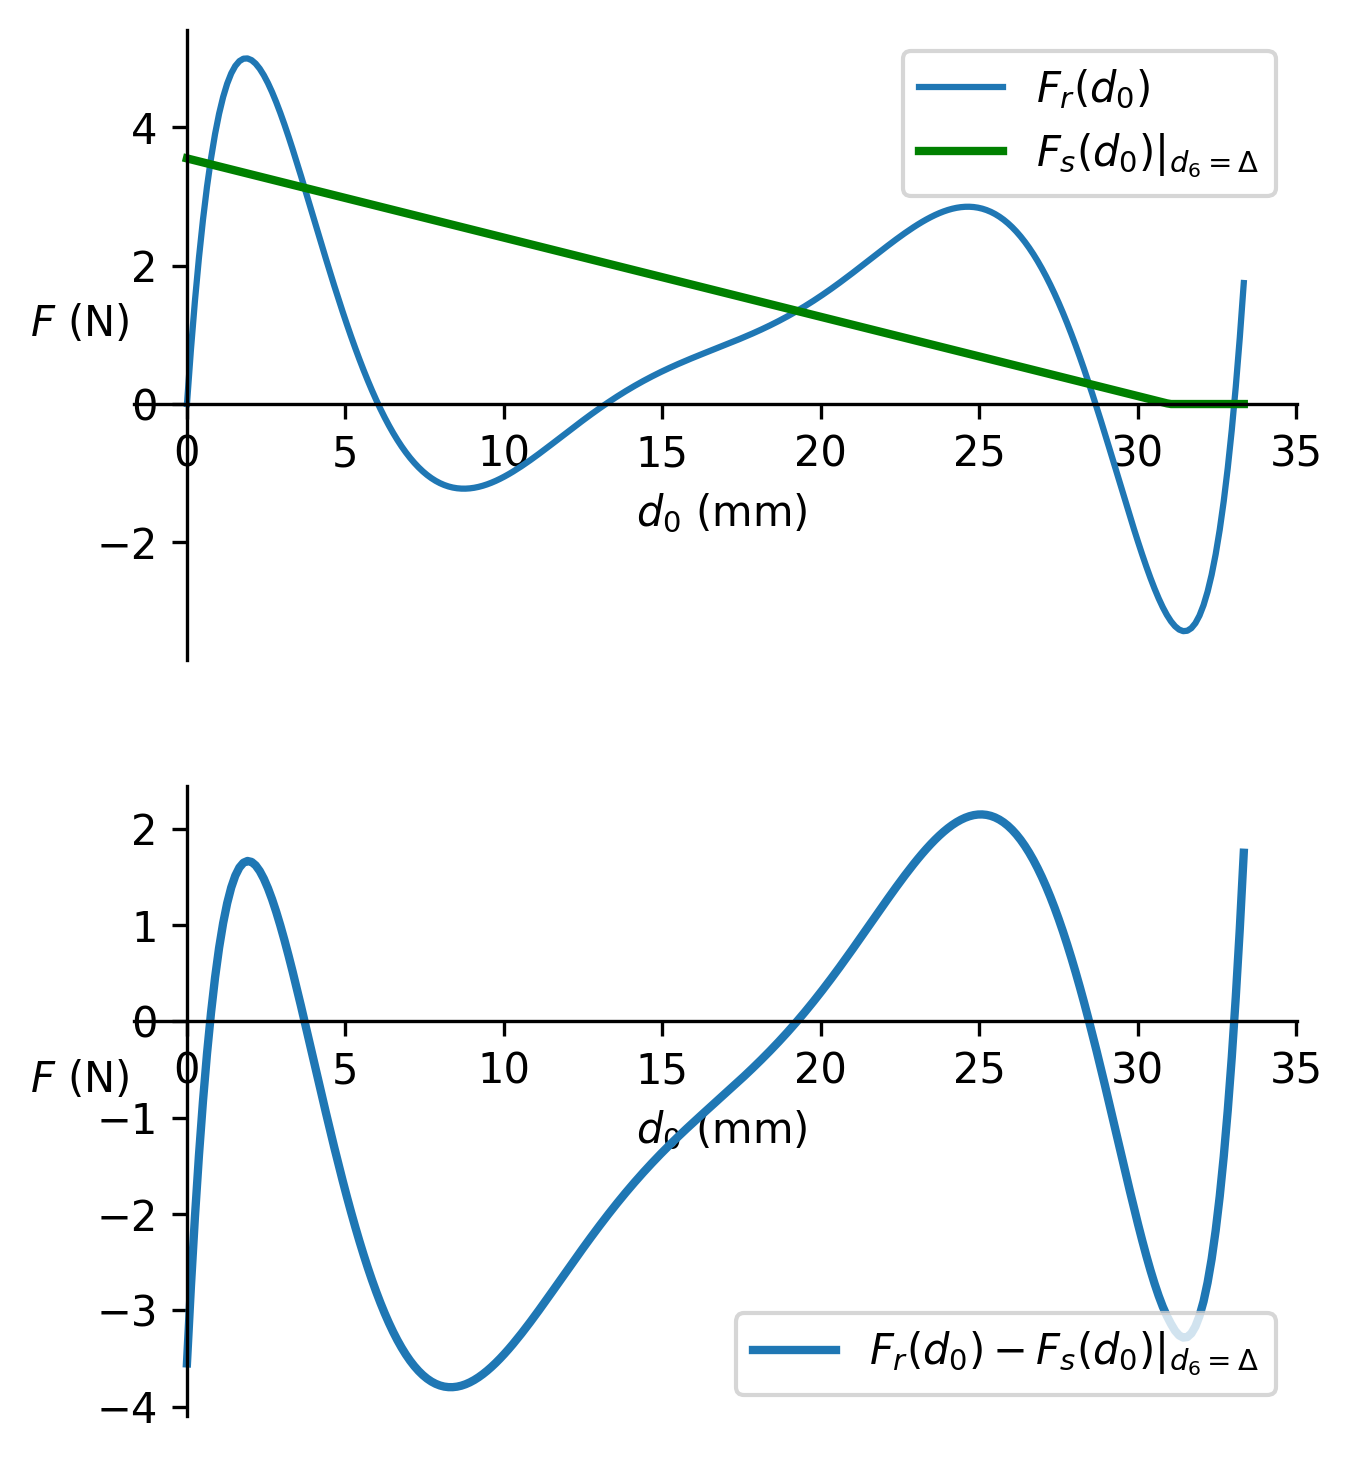

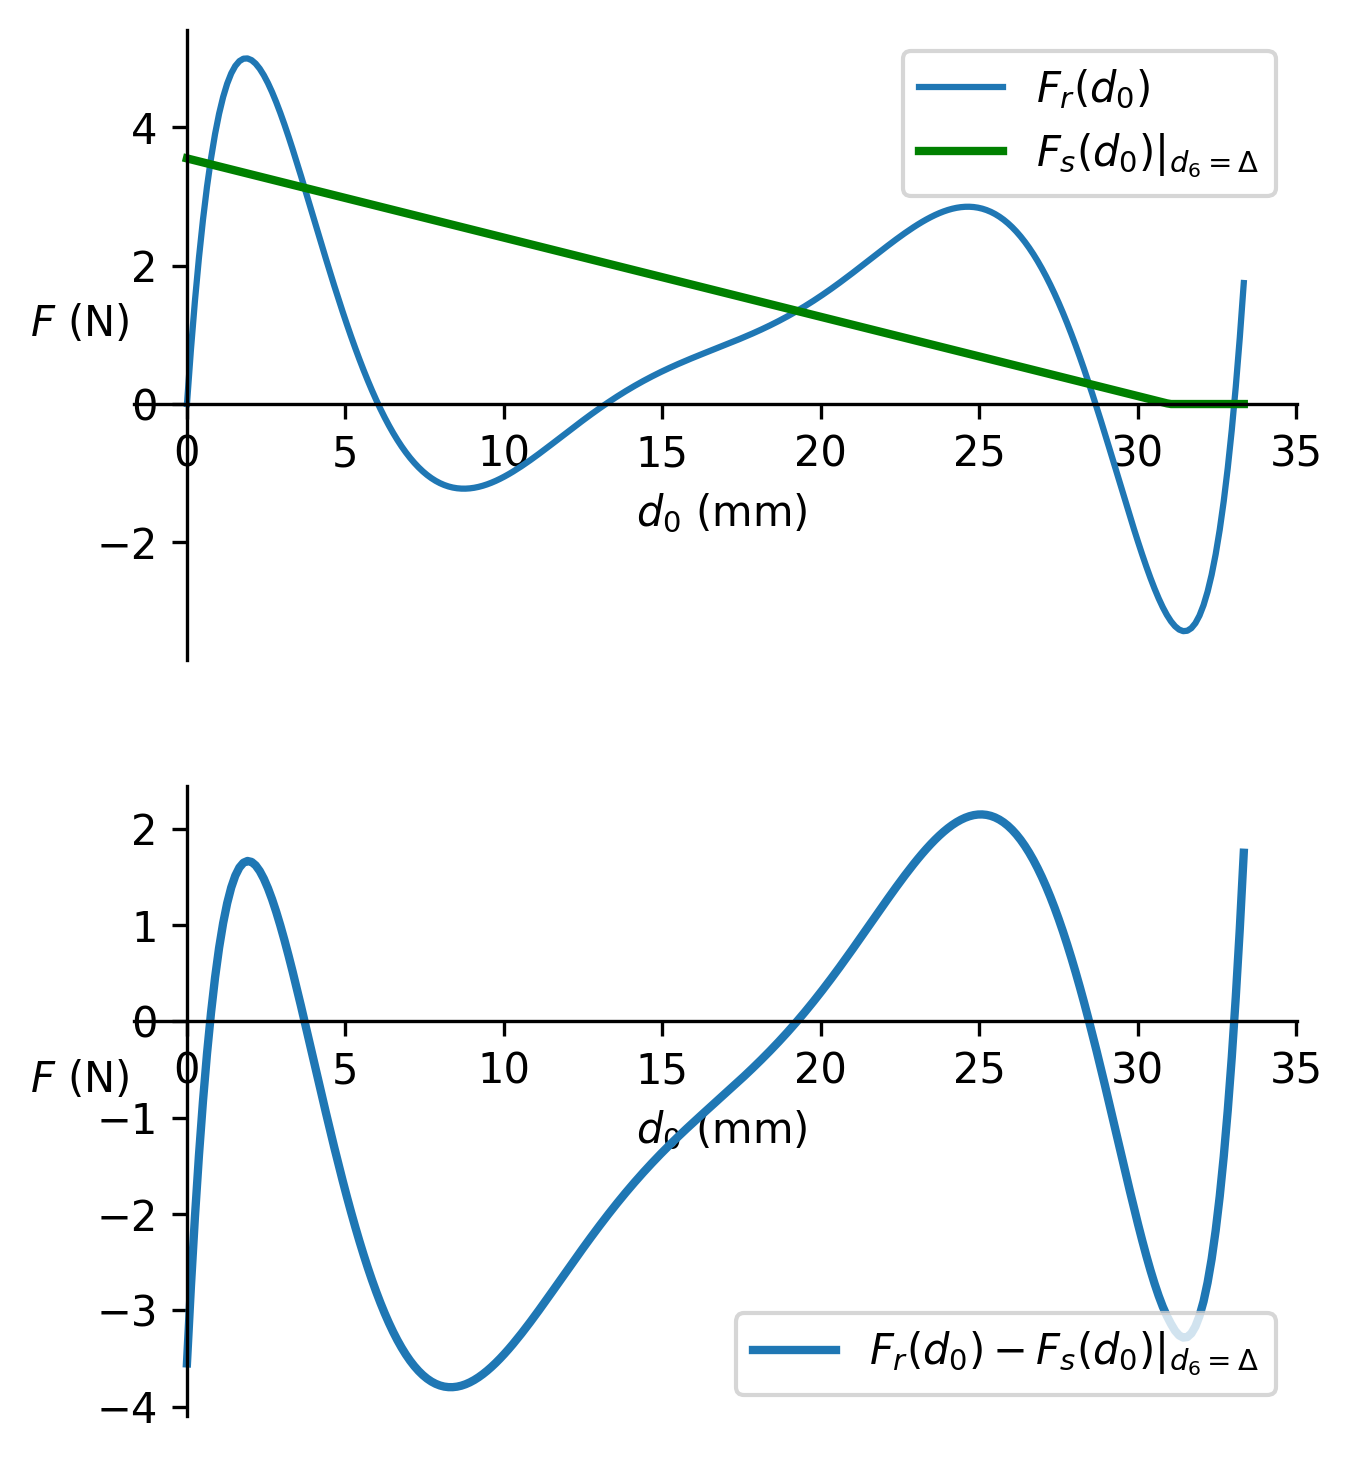

In [328]:
spring_fd = lambda xs: [K*x if x>0 else 0 for x in xs ]
K = params['K1']
fig = plt.figure(figsize=(5,6),dpi=300)
ax = fig.add_subplot(211)
ax_style(ax)
ax.set_xlabel(r' $d_0$ (mm)',loc='center')
d6range = np.linspace(-30e-3,30e-3,101)
ax.plot(d0*1000,force_response)

x = np.ones_like(d0)*d6-d0
ax.plot(d0*1000,spring_fd(x),linewidth=2,color='green')
ax.set_ylabel(r'$F$ (N)',rotation=0,loc='center')
ax.legend(['$F_r(d_0)$','$F_s(d_0)|_{d_6=\Delta}$'])

# ax.plot(d6range*1000,[spring_fd(d6) for d6 in d6range],linewidth=2,color='green')
# ax.set_ylabel(r'$F_s$ (N)',rotation=0,loc='center')
# ax.set_ylim([-1.5,3.5])

ax = fig.add_subplot(212)
ax_style(ax)
ax.set_xlabel(r' $d_0$ (mm)',loc='center')
ax.plot(d0*1000,force_response-spring_fd(x),linewidth=2)
ax.set_ylabel(r'$F$ (N)',rotation=0,loc='center')
ax.legend(['$F_r(d_0)-F_s(d_0)|_{d_6=\Delta}$'],loc='lower right')
fig

Rule: 110, d6: 31.01 mm, k_critical: 171.81 N/m, k_critical2: 515.39 N/m, stiffnesses: 114.54 N/m, 229.08 N/m, 229.08 N/m


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


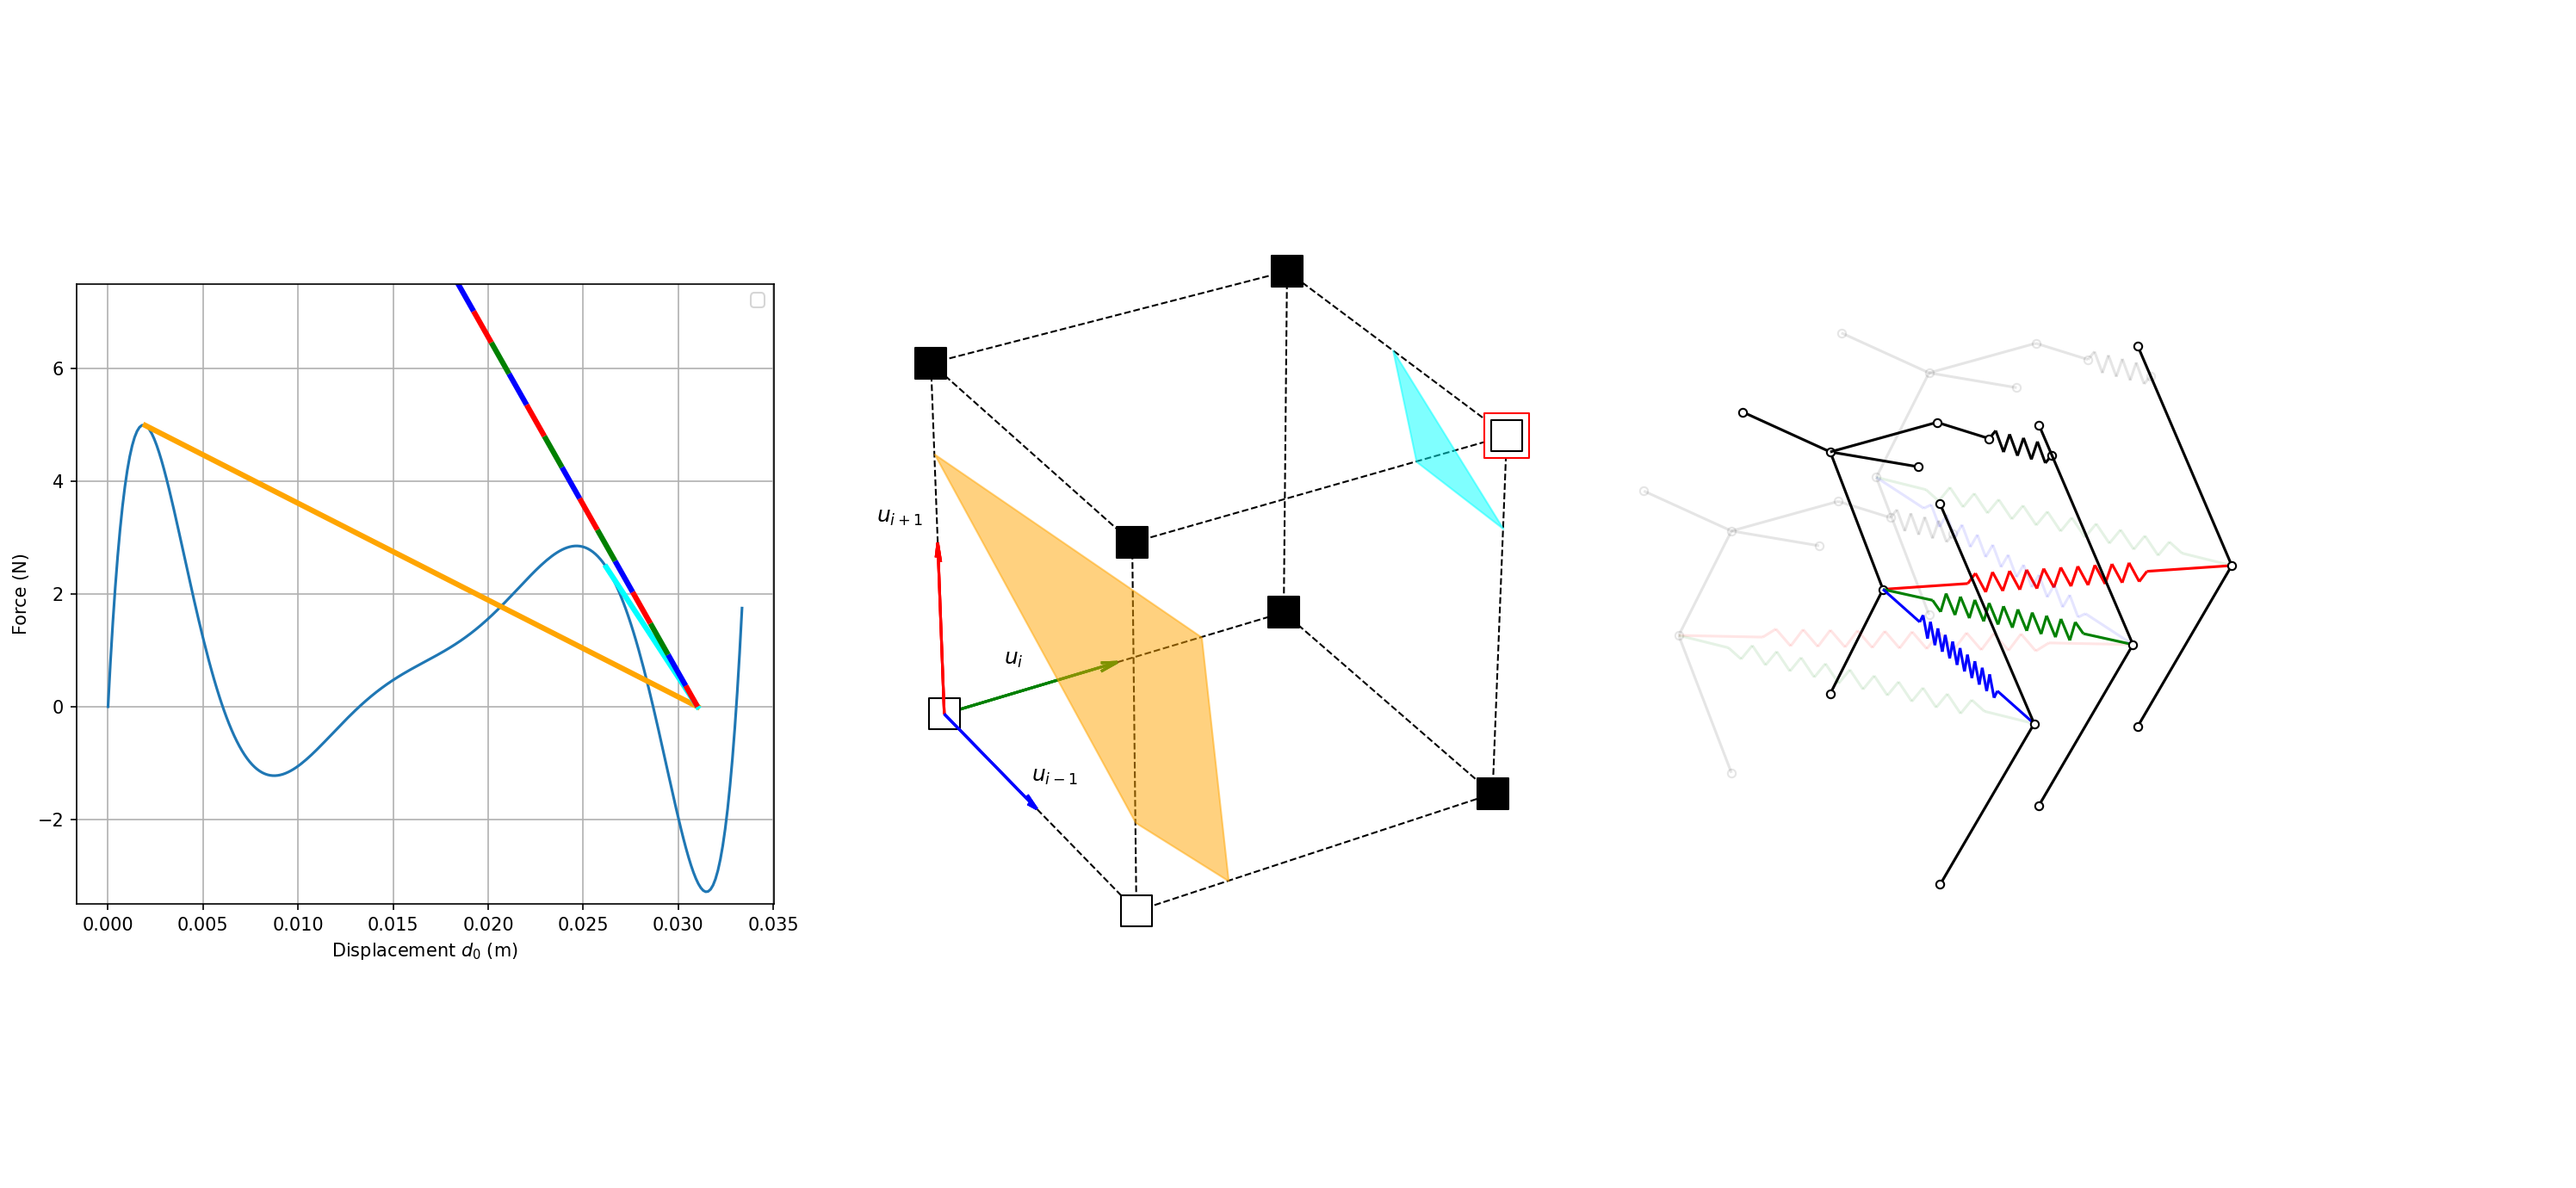

In [243]:
%run ../ElementaryCA.py
%run ../ECA_plotting.py
rule_dict = separable_rules()
rulenum = 110
rule = rule_dict[rulenum]
d6 = stiffness_ratio_spline_inverse(rule[1][1]/rule[1][0])
k_critical = slope1_spline(d6)
k_critical2 = slope2_spline(d6)
stiffnesses = rule[0]*k_critical/rule[1][0]
params['K1'],params['K2'],params['K3'] = stiffnesses
params['K2'] *= 1.1

print(f'Rule: {rulenum}, d6: {d6*1e3:.2f} mm, k_critical: {k_critical:.2f} N/m, k_critical2: {k_critical2:.2f} N/m, stiffnesses: {stiffnesses[0]:.2f} N/m, {stiffnesses[1]:.2f} N/m, {stiffnesses[2]:.2f} N/m')
config = [0,0,0]
system = System(config,params)

fig = plt.figure(figsize=(18,6))
fig.dpi=150
ax1 = fig.add_subplot(131)
plt.grid()

force_response, d0 = system.get_force_response()
results = system.get_threshold_stiffnesses(d6max=d6)
ax1.plot(d0,force_response)
ax1.set_xlabel(r'Displacement $d_0$ (m)')
ax1.set_ylabel('Force (N)')

ax1.plot((results[0][0],d6),(results[0][1],0),'-',linewidth=3, color='orange')
ax1.plot((results[1][0],d6),(results[1][1],0),'-',linewidth=3, color='cyan')
ps = powerset([params['K1'],params['K2'],params['K3']])
sums =[sum(x) for x in list(ps) if x]
colors = ['b','g','r',['b','g'],['b','r'],['r','g'],['b','g','r']]
vertices = [[1,0,0],[0,1,0],[0,0,1],[1,1,0],[1,0,1],[0,1,1],[1,1,1]]
cum_stiffness_lines = []
for c,num in zip(colors,sums):
    # ax1.plot((0,d6-params['tog_offset']),(num*(d6-params['tog_offset']),0),c+'--',linewidth=0.8)
    # ax1.plot((0,d6),(num*(d6),0),c+'-',linewidth=0.8)
    cum_stiffness_lines.append(plot_multi_dashed(ax1,np.linspace(0,d6,100),np.linspace(num*d6,0,100),c,20))
#set ylimits
ax1.set_ylim([-3.5,7.5])
ax1.legend()

mask=6
pos = [1,0,0,0,0,0,-1]
ax3 = fig.add_subplot(133,projection='3d')
d6 = 32e-3
theta_max = np.arcsin(np.sin(params['theta0']-d6/params['L4']))

config = [0,0,0]
system = System(config,params)
system.cell_spacing = 0.5e-1
x= system.state_vector
new_state = (np.array(vertices[mask])-np.ones(3)*0.5)*2
x[1::2] = theta_max*new_state

x[2] = pos[mask]*params['alpha0']


system.plot_system(fig= fig2, ax=ax3)
system.update_plot(0,[x])
ax3.view_init(azim=-58, elev=30)



for i in [0,2]:
    system.tristable_lines[i].set_alpha(0.1) 
    system.tristable_joints[i].set_alpha(0.1)
    system.signal_router_lines[i].set_alpha(0.1)
    system.signal_router_joints[i].set_alpha(0.1)
    system.signal_spring_lines[i].set_alpha(0.1)
    system.self_spring_lines[i].set_alpha(0.1)
    try:
        system.left_spring_lines[i].set_alpha(0.1)
    except:
        pass
    try:
        system.right_spring_lines[i].set_alpha(0.1)
    except:
        pass


ax2 = fig.add_subplot(132,projection='3d')
plotSetup(fig=fig, ax=ax2)
drawCube(ax2)
v_handles = []
for vertex in vertices:
    h = ax2.scatter(*vertex, color='white', edgecolor='red', s=600, marker='s',zorder=9)
    v_handles.append(h)
plot_triad_quiver(ax2,0.5)
planes= plot_cube_with_planes(ax2,stiffnesses,k_critical,k_critical2)
planes[0].set_color('orange')
planes[1].set_color('cyan')




ax1.set_position([0.05,0.1,0.3,0.8])
ax2.set_position([0.16,0.05,0.75,1])
ax3.set_position([0.62,-0.5,0.5,2])

for line in cum_stiffness_lines:
    for section in line:
        section.set_visible(False)
for v in v_handles:
    v.set_visible(False)



line = cum_stiffness_lines[mask]
for section in line:
    section.set_visible(True)
v_handles[mask].set_visible(True)
fig.savefig(f'{mask}.png',dpi=300)



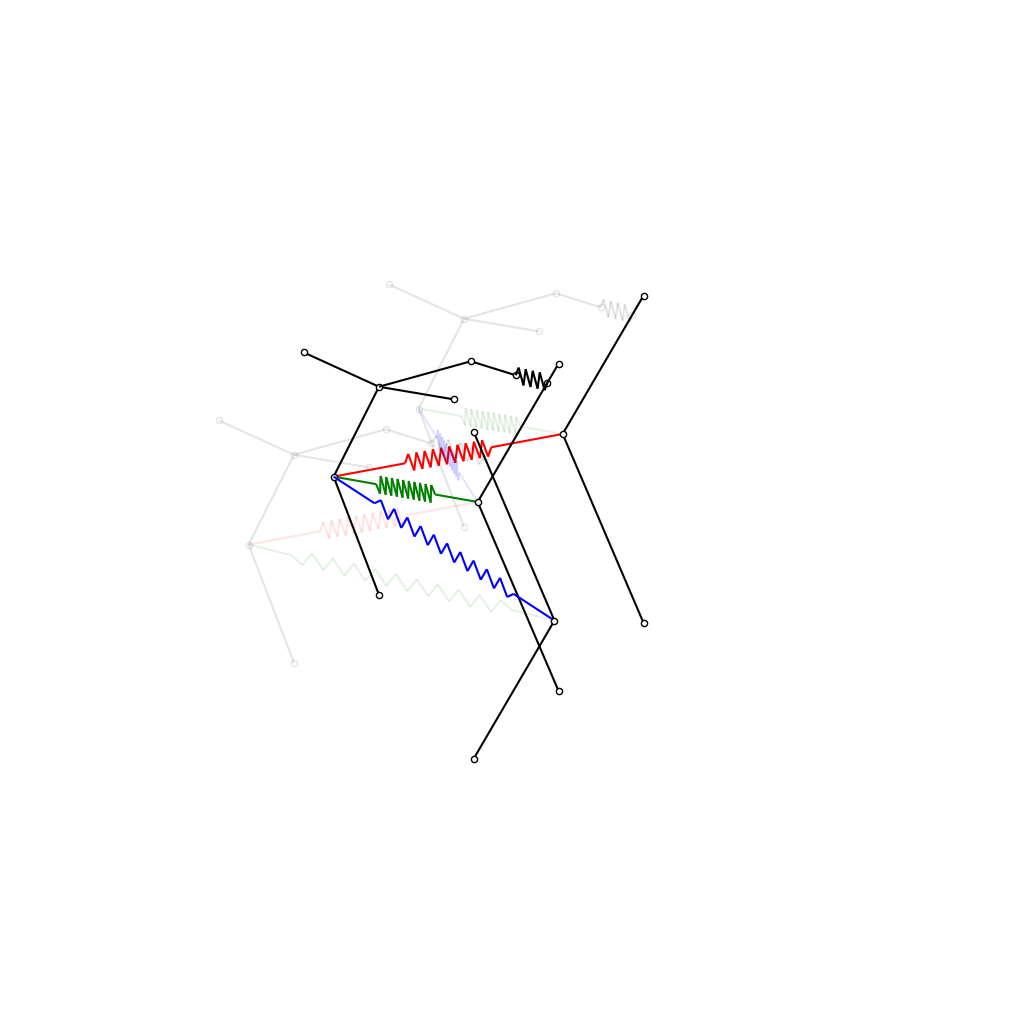

In [177]:

fig2 = plt.figure(figsize=(10,10))
ax3 = fig2.add_subplot(111,projection='3d')
d6 = 32e-3
theta_max = np.arcsin(np.sin(params['theta0']-d6/params['L4']))

config = [0,0,0]
system = System(config,params)
system.cell_spacing = 0.5e-1
x= system.state_vector
new_state = (np.array(vertices[mask])-np.ones(3)*0.5)*2
x[1::2] = theta_max*new_state
x[2] = params['alpha0']


system.plot_system(fig= fig2, ax=ax3)
system.update_plot(0,[x])
ax3.view_init(azim=-58, elev=30)



for i in [0,2]:
    system.tristable_lines[i].set_alpha(0.1) 
    system.tristable_joints[i].set_alpha(0.1)
    system.signal_router_lines[i].set_alpha(0.1)
    system.signal_router_joints[i].set_alpha(0.1)
    system.signal_spring_lines[i].set_alpha(0.1)
    system.self_spring_lines[i].set_alpha(0.1)
    try:
        system.left_spring_lines[i].set_alpha(0.1)
    except:
        pass
    try:
        system.right_spring_lines[i].set_alpha(0.1)
    except:
        pass
# for i in [0,4]:
#     system.bifurcation_lines[i].set_alpha(0.1)
#     system.bifurcation_joints[i].set_alpha(0.1)
#show panes of 3d plot
plt.savefig(f'{mask}_3d.png',dpi=300)


In [13]:
configs =[
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1],
]


In [23]:
end_states = []
for config in configs:
    print(config)
    system=System(config,params)
    results, y, t = system.simulate_actuation(d6max=d6,frames_per_cycle=900)
    end_states.append(system.get_configuration()[1])

[0, 0, 0]
[0, 0, 1]
[0, 1, 0]
[0, 1, 1]
[1, 0, 0]
[1, 0, 1]
[1, 1, 0]
[1, 1, 1]


In [24]:
binlist2dec(end_states,1)


62

(-0.5, 0.5)

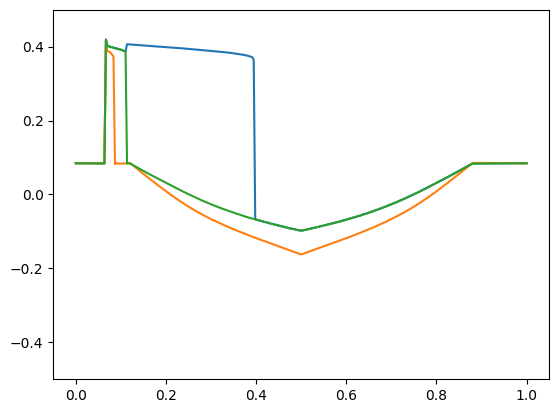

In [13]:
plt.figure(dpi=100)
for i in range(system.n):
    plt.plot(t, results[:, 2*i])
plt.ylim([-0.5, 0.5])

In [25]:
output_dict = {}

rules = [72,22, 126, 30, 6,
        106,60, 124, 
        104, 62]

for rule_num in rules:
    print(rule_num)
    output_dict[rule_num] = {}
    rule = rule_dict[rule_num]


    d6 = stiffness_ratio_spline_inverse(rule[1][1]/rule[1][0])
    k_critical = slope1_spline(d6)
    stiffnesses = rule[0]*k_critical/rule[1][0]
    params['K1'],params['K2'],params['K3'] = stiffnesses
    
    end_states = []
    output_dict[rule_num]['sims'] = {}
    for config in configs:
        system=System(config,params)
        results, y, t = system.simulate_actuation(d6max=d6,frames_per_cycle=900)
        end_states.append(system.get_configuration()[1])
        output_dict[rule_num]['sims'][str(''.join([str(x) for x in config]))] = [results, y, t]

    output_dict[rule_num]['desired behaviour'] = rulebin(rule_num)
    output_dict[rule_num]['behaviour'] = binlist2dec(end_states,1)
    output_dict[rule_num]['stiffnesses'] = stiffnesses
    output_dict[rule_num]['d6'] = d6

72
22
126
30
6
106
60
124
104
62


In [5]:
for rule in output_dict:
    print(f'Rule {rule} => {output_dict[rule]["behaviour"]}')

Rule 72 => 72
Rule 22 => 22
Rule 126 => 126
Rule 30 => 30
Rule 6 => 6
Rule 106 => 106
Rule 60 => 60
Rule 124 => 124
Rule 104 => 104
Rule 62 => 62


(-0.5, 0.5)

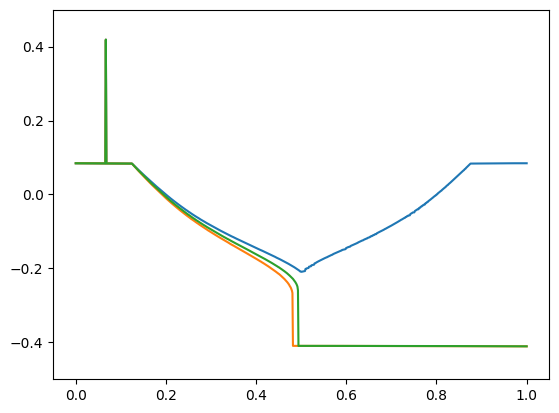

In [27]:
results =output_dict[62]['sims']['111'][0]

plt.figure(dpi=100)
for i in range(system.n):
    plt.plot(t, results[:, 2*i])
plt.ylim([-0.5, 0.5])

In [28]:


filename = 'output_dict.pkl'

with open(filename, 'wb') as f:
    pickle.dump(output_dict, f)

with open(filename, 'rb') as f:
    output_dict = pickle.load(f)
    


In [30]:
#Convergence test
params["tog_offset"]=1.4e-3
rule_num = 22
steps = [500,600,900]
conv_output = {}
for numsteps in steps:

    rule = rule_dict[rule_num]
    conv_output[numsteps] = {}

    d6 = stiffness_ratio_spline_inverse(rule[1][1]/rule[1][0])
    k_critical = slope1_spline(d6)
    stiffnesses = rule[0]*k_critical/rule[1][0]
    params['K1'],params['K2'],params['K3'] = stiffnesses
    
    end_states = []
    conv_output[numsteps]['sims'] = {}
    for config in configs:
        system=System(config,params)
        results, y, t = system.simulate_actuation(d6max=d6,frames_per_cycle=numsteps)
        end_states.append(system.get_configuration()[1])
        conv_output[numsteps]['sims'][str(''.join([str(x) for x in config]))] = [results, y, t]

    conv_output[numsteps]['desired behaviour'] = rulebin(rule_num)
    conv_output[numsteps]['behaviour'] = binlist2dec(end_states,1)

for steps in conv_output:
    print(f'Steps {steps}: {conv_output[steps]["behaviour"]}')

Steps 500: 22
Steps 600: 18
Steps 900: 22


In [29]:
results =conv_output[400]['sims']['111'][0]

plt.figure(dpi=100)
for i in range(system.n):
    plt.plot(t, results[:, 2*i])
plt.ylim([-0.5, 0.5])


NameError: name 'conv_output' is not defined